In [5]:
!pip install datasets transformers
!pip install fvcore
!pip install -U zetascale

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [6]:
!apt-get install git-lfs
!git lfs install
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datasets/allenai/c4
%cd c4
!git lfs pull --include "en/c4-train.00000-of-01024.json.gz"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Updated git hooks.
Git LFS initialized.
Cloning into 'c4'...
remote: Enumerating objects: 87108, done.
remote: Total 87108 (delta 0), reused 0 (delta 0), pack-reused 87108 (from 1)
Receiving objects: 100% (87108/87108), 12.30 MiB | 10.52 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (69221/69221), done.
/content/c4/c4


In [7]:
from datasets import load_dataset

from transformers import T5TokenizerFast, T5Tokenizer

import gzip
import json

def load_json_gz(filepath):
    with gzip.open(filepath, 'rb') as f:
        for line in f:
            yield json.loads(line)

# Load the small subset you downloaded
dataset_path = 'en/c4-train.00000-of-01024.json.gz'
data = list(load_json_gz(dataset_path))

# Preview a few examples
print(data[:2])

# Load the fast version of the T5 tokenizer
#tokenizer = T5TokenizerFast.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained('t5-small', use_fast=True)
# Load the C4 dataset
tokenized_data = [tokenizer.encode(d['text'], return_tensors='pt') for d in data[:100]]

#tokenized_data.set_format(type="torch", columns=["input_ids"])

[{'text': 'Beginners BBQ Class Taking Place in Missoula!\nDo you want to get better at making delicious BBQ? You will have the opportunity, put this on your calendar now. Thursday, September 22nd join World Class BBQ Champion, Tony Balay from Lonestar Smoke Rangers. He will be teaching a beginner level class for everyone who wants to get better with their culinary skills.\nHe will teach you everything you need to know to compete in a KCBS BBQ competition, including techniques, recipes, timelines, meat selection and trimming, plus smoker and fire information.\nThe cost to be in the class is $35 per person, and for spectators it is free. Included in the cost will be either a t-shirt or apron and you will be tasting samples of each meat that is prepared.', 'timestamp': '2019-04-25T12:57:54Z', 'url': 'https://klyq.com/beginners-bbq-class-taking-place-in-missoula/'}, {'text': 'Discussion in \'Mac OS X Lion (10.7)\' started by axboi87, Jan 20, 2012.\nI\'ve got a 500gb internal drive and a 24

Energy for expert  0 38.095
Flops for expert layer  0 26.080182272
Energy for expert  1 55.11
Flops for expert layer  1 26.080182272
Energy for expert  2 42.925
Flops for expert layer  2 26.080182272
Energy for expert  3 51.53
Flops for expert layer  3 26.080182272
Energy for expert  4 35.81
Flops for expert layer  4 26.080182272
Energy for expert  5 39.0
Flops for expert layer  5 26.080182272


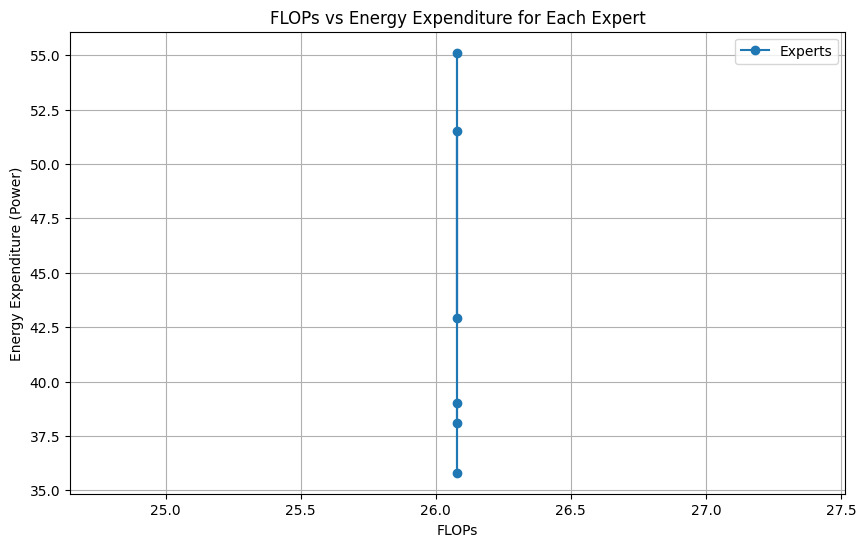

Energy for expert  0 50.230000000000004
Flops for expert layer  0 26.080182272
Energy for expert  1 43.88
Flops for expert layer  1 26.080182272
Energy for expert  2 46.93
Flops for expert layer  2 26.080182272
Energy for expert  3 47.94
Flops for expert layer  3 26.080182272
Energy for expert  4 52.63
Flops for expert layer  4 26.080182272
Energy for expert  5 31.13
Flops for expert layer  5 26.080182272


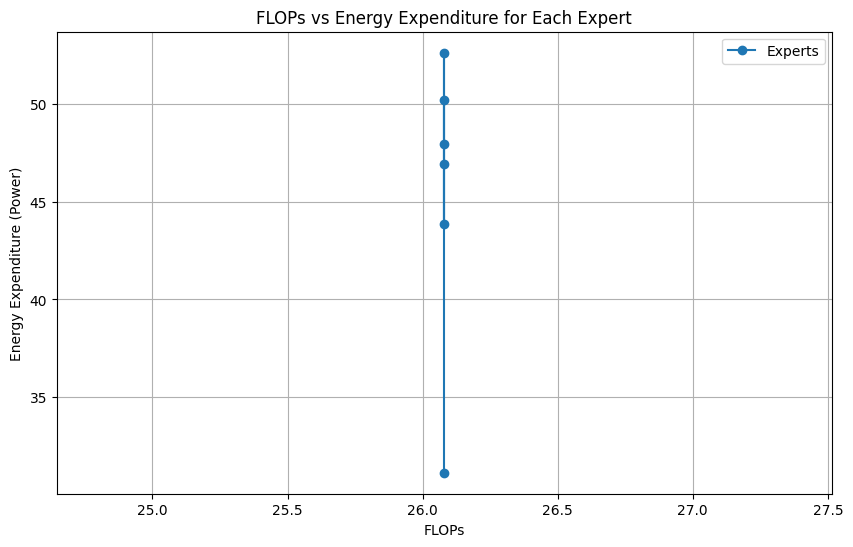

Energy for expert  0 77.11
Flops for expert layer  0 26.080182272
Energy for expert  1 40.96
Flops for expert layer  1 26.080182272
Energy for expert  2 45.035
Flops for expert layer  2 26.080182272
Energy for expert  3 83.13
Flops for expert layer  3 26.080182272
Energy for expert  4 38.09
Flops for expert layer  4 26.080182272
Energy for expert  5 56.15
Flops for expert layer  5 26.080182272


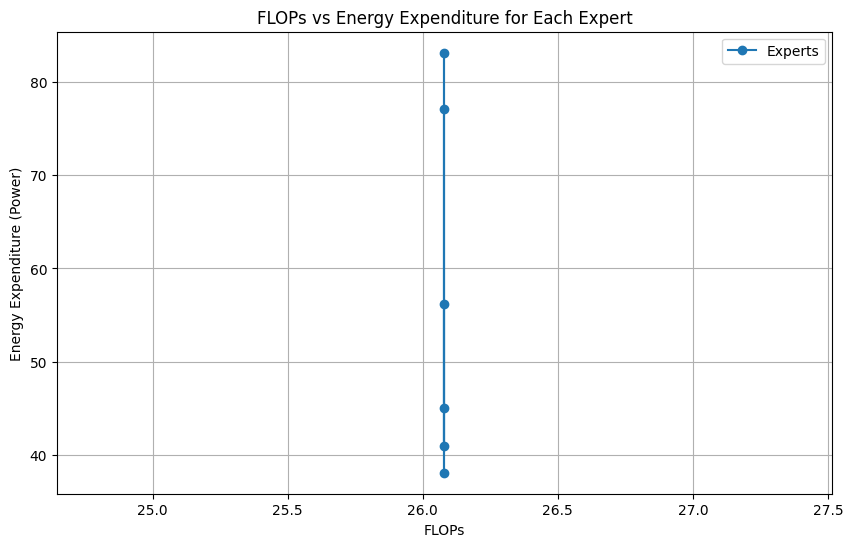

Epoch 1/5, Loss: 28.780416170756023, Top-k Accuracy (k=5): 0.11629901960784313
Energy for expert  0 62.42
Flops for expert layer  0 26.080182272
Energy for expert  1 43.245000000000005
Flops for expert layer  1 26.080182272
Energy for expert  2 66.18
Flops for expert layer  2 26.080182272
Energy for expert  3 40.535
Flops for expert layer  3 26.080182272
Energy for expert  4 42.8
Flops for expert layer  4 26.080182272
Energy for expert  5 40.6
Flops for expert layer  5 26.080182272


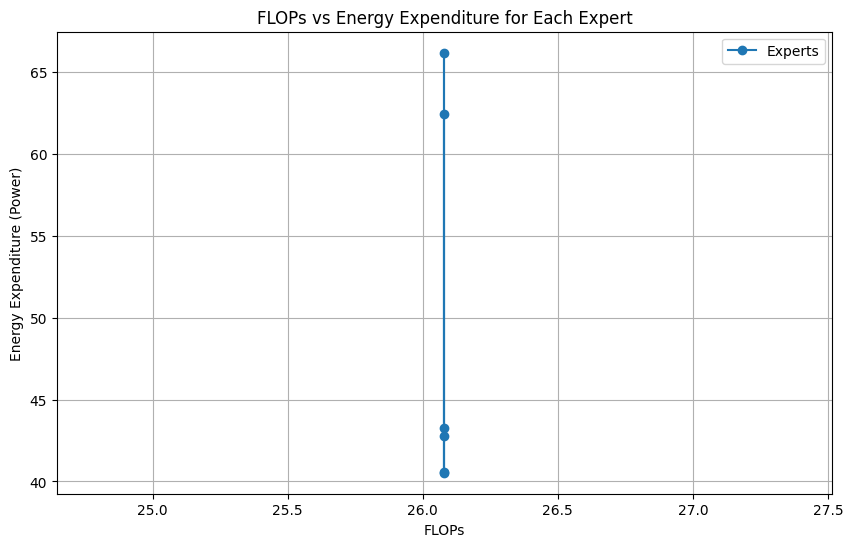

Energy for expert  0 41.94
Flops for expert layer  0 26.080182272
Energy for expert  1 81.86
Flops for expert layer  1 26.080182272
Energy for expert  2 42.02
Flops for expert layer  2 26.080182272
Energy for expert  3 59.77
Flops for expert layer  3 26.080182272
Energy for expert  4 32.88
Flops for expert layer  4 26.080182272
Energy for expert  5 46.43
Flops for expert layer  5 26.080182272


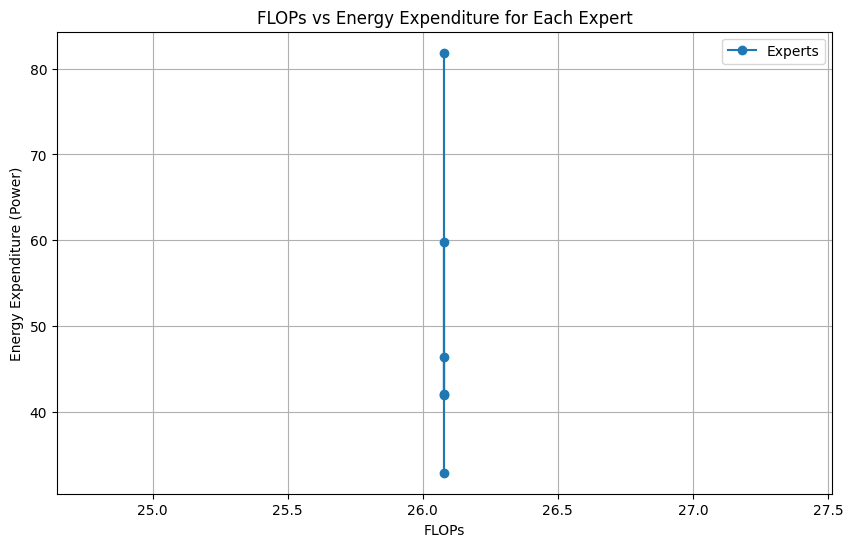

Energy for expert  0 62.46
Flops for expert layer  0 26.080182272
Energy for expert  1 42.959999999999994
Flops for expert layer  1 26.080182272
Energy for expert  2 33.425
Flops for expert layer  2 26.080182272
Energy for expert  3 52.31
Flops for expert layer  3 26.080182272
Energy for expert  4 43.22
Flops for expert layer  4 26.080182272
Energy for expert  5 32.21
Flops for expert layer  5 26.080182272


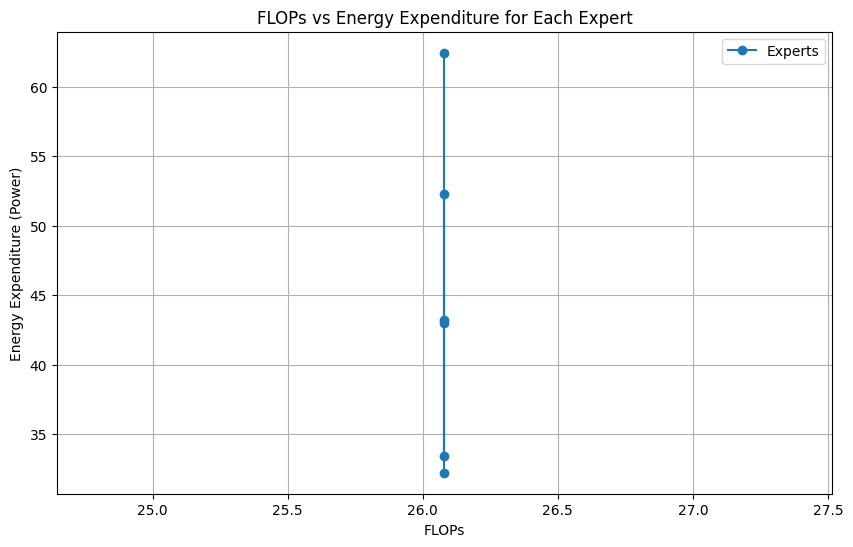

Epoch 2/5, Loss: 18.305464108784992, Top-k Accuracy (k=5): 0.2800653594771242
Energy for expert  0 45.175
Flops for expert layer  0 26.080182272
Energy for expert  1 88.34
Flops for expert layer  1 26.080182272
Energy for expert  2 55.34
Flops for expert layer  2 26.080182272
Energy for expert  3 78.95
Flops for expert layer  3 26.080182272
Energy for expert  4 32.98
Flops for expert layer  4 26.080182272
Energy for expert  5 54.23
Flops for expert layer  5 26.080182272


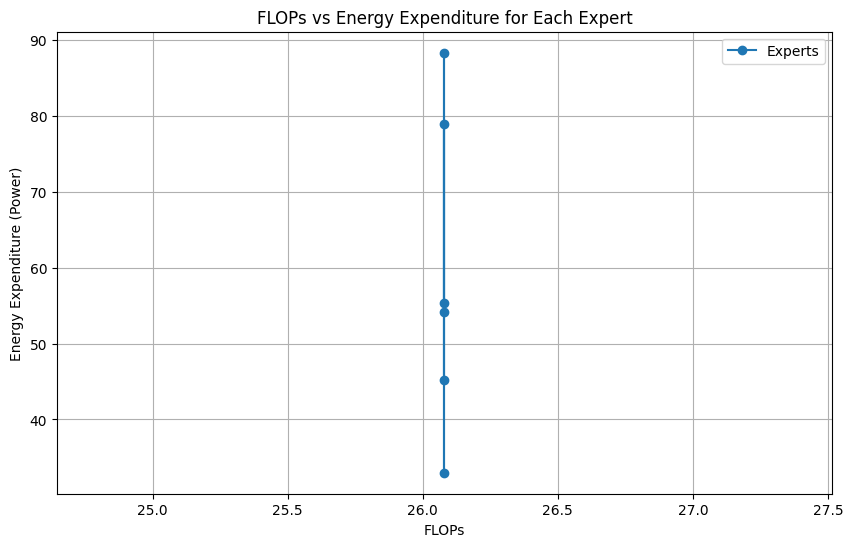

Energy for expert  0 59.955
Flops for expert layer  0 26.080182272
Energy for expert  1 81.81
Flops for expert layer  1 26.080182272
Energy for expert  2 42.92
Flops for expert layer  2 26.080182272
Energy for expert  3 60.67
Flops for expert layer  3 26.080182272
Energy for expert  4 36.77
Flops for expert layer  4 26.080182272
Energy for expert  5 32.88
Flops for expert layer  5 26.080182272


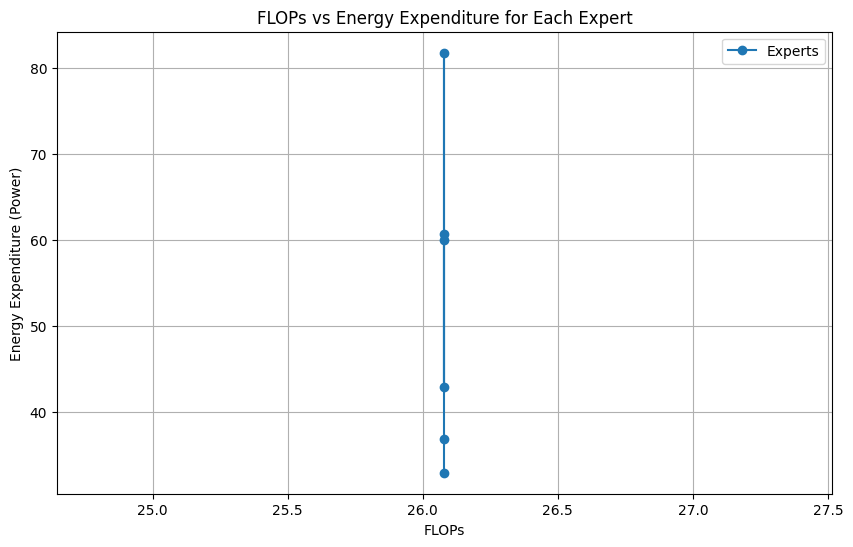

Energy for expert  0 46.37
Flops for expert layer  0 26.080182272
Energy for expert  1 55.650000000000006
Flops for expert layer  1 26.080182272
Energy for expert  2 69.64
Flops for expert layer  2 26.080182272
Energy for expert  3 43.1
Flops for expert layer  3 26.080182272
Energy for expert  4 41.33
Flops for expert layer  4 26.080182272
Energy for expert  5 43.885000000000005
Flops for expert layer  5 26.080182272


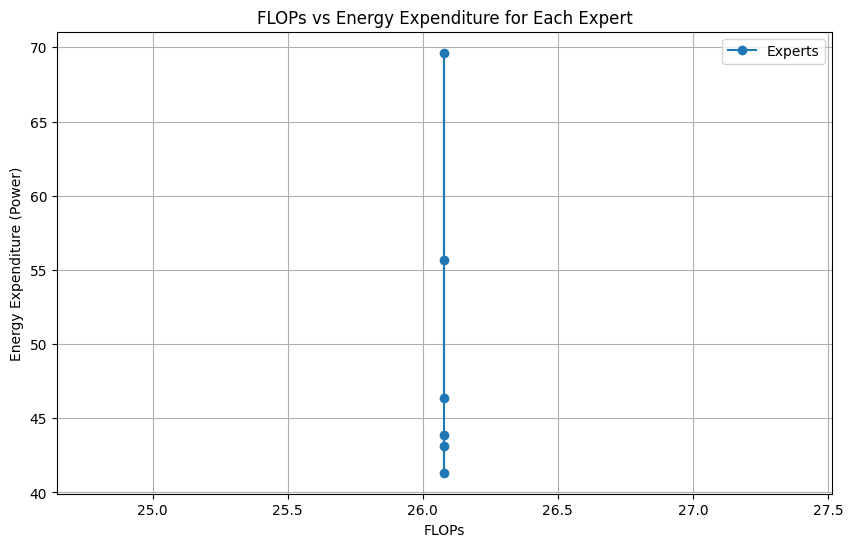

Epoch 3/5, Loss: 10.124715169270834, Top-k Accuracy (k=5): 0.14546568627450981
Energy for expert  0 54.435
Flops for expert layer  0 26.080182272
Energy for expert  1 42.24
Flops for expert layer  1 26.080182272
Energy for expert  2 33.75
Flops for expert layer  2 26.080182272
Energy for expert  3 39.385000000000005
Flops for expert layer  3 26.080182272
Energy for expert  4 52.51
Flops for expert layer  4 26.080182272
Energy for expert  5 44.86
Flops for expert layer  5 26.080182272


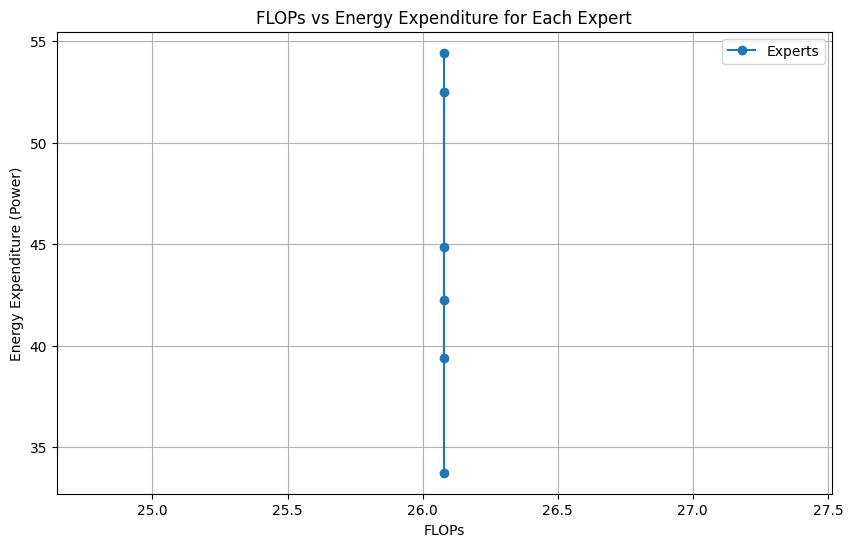

Energy for expert  0 43.56
Flops for expert layer  0 26.080182272
Energy for expert  1 67.94
Flops for expert layer  1 26.080182272
Energy for expert  2 42.51
Flops for expert layer  2 26.080182272
Energy for expert  3 54.43
Flops for expert layer  3 26.080182272
Energy for expert  4 33.37
Flops for expert layer  4 26.080182272
Energy for expert  5 41.375
Flops for expert layer  5 26.080182272


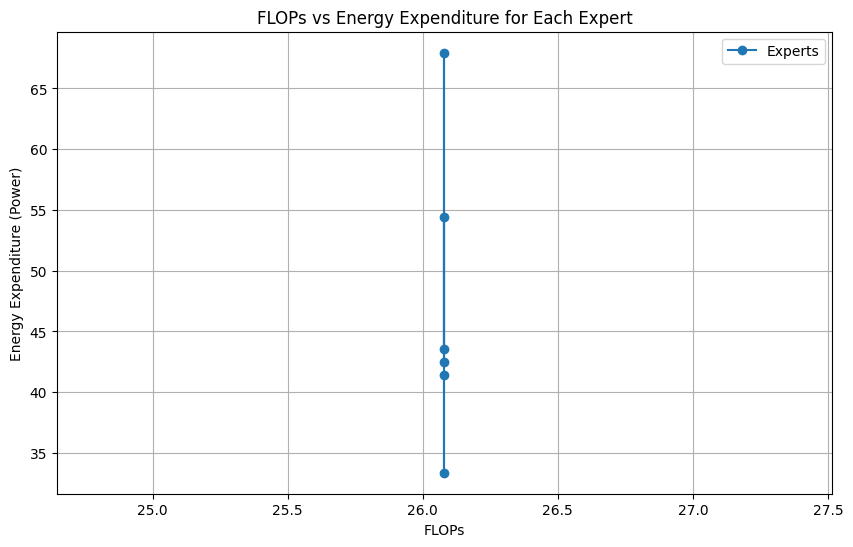

Energy for expert  0 63.379999999999995
Flops for expert layer  0 26.080182272
Energy for expert  1 92.18
Flops for expert layer  1 26.080182272
Energy for expert  2 43.49
Flops for expert layer  2 26.080182272
Energy for expert  3 69.33
Flops for expert layer  3 26.080182272
Energy for expert  4 33.67
Flops for expert layer  4 26.080182272
Energy for expert  5 57.36
Flops for expert layer  5 26.080182272


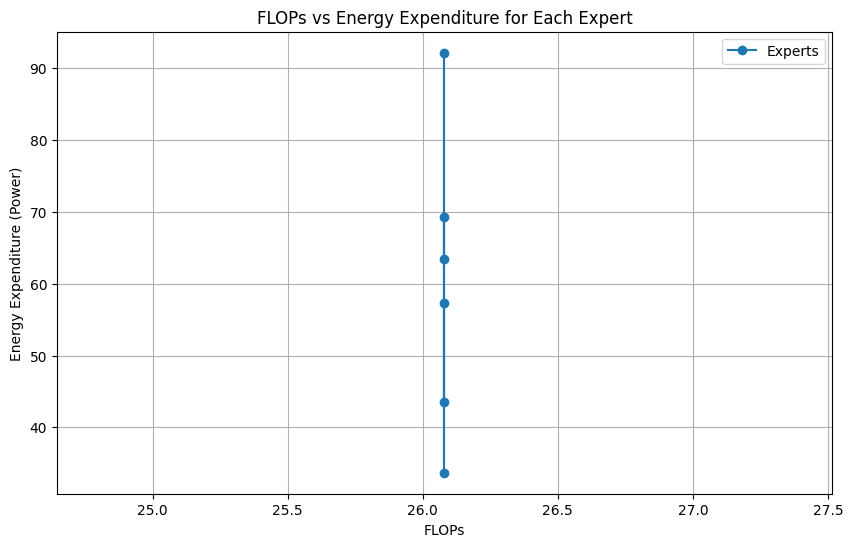

Epoch 4/5, Loss: 10.565755844116211, Top-k Accuracy (k=5): 0.09015522875816993
Energy for expert  0 53.94
Flops for expert layer  0 26.080182272
Energy for expert  1 52.02
Flops for expert layer  1 26.080182272
Energy for expert  2 55.01
Flops for expert layer  2 26.080182272
Energy for expert  3 42.205
Flops for expert layer  3 26.080182272
Energy for expert  4 52.05
Flops for expert layer  4 26.080182272
Energy for expert  5 38.73
Flops for expert layer  5 26.080182272


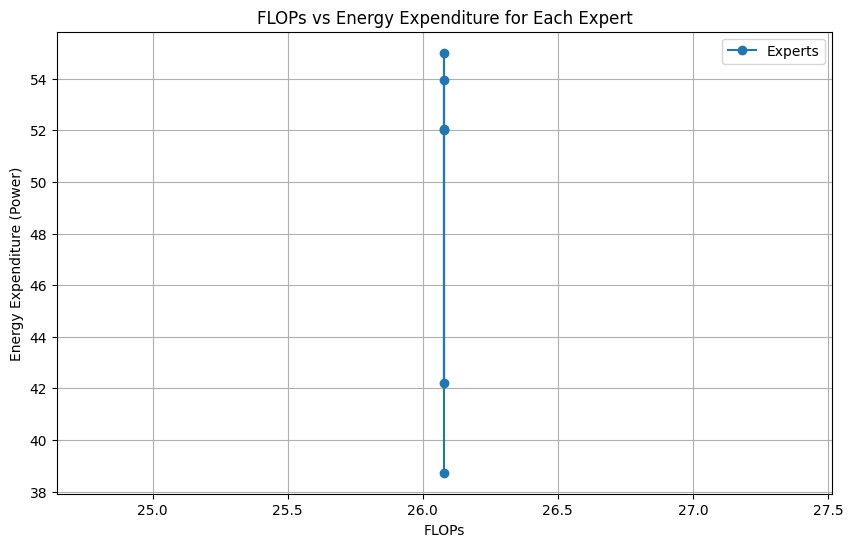

Energy for expert  0 72.44
Flops for expert layer  0 26.080182272
Energy for expert  1 53.67
Flops for expert layer  1 26.080182272
Energy for expert  2 44.66
Flops for expert layer  2 26.080182272
Energy for expert  3 41.144999999999996
Flops for expert layer  3 26.080182272
Energy for expert  4 33.67
Flops for expert layer  4 26.080182272
Energy for expert  5 32.88
Flops for expert layer  5 26.080182272


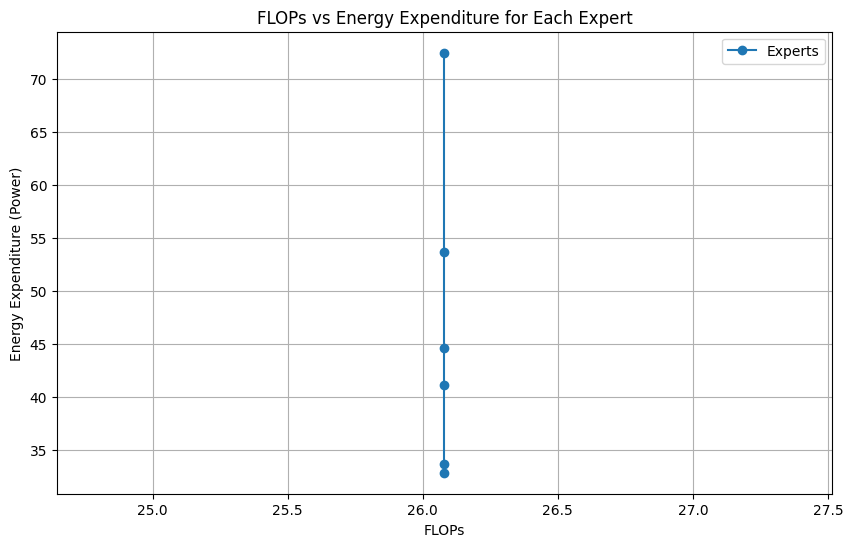

Energy for expert  0 43.49
Flops for expert layer  0 26.080182272
Energy for expert  1 54.43
Flops for expert layer  1 26.080182272
Energy for expert  2 90.12
Flops for expert layer  2 26.080182272
Energy for expert  3 65.22
Flops for expert layer  3 26.080182272
Energy for expert  4 57.65
Flops for expert layer  4 26.080182272
Energy for expert  5 34.06
Flops for expert layer  5 26.080182272


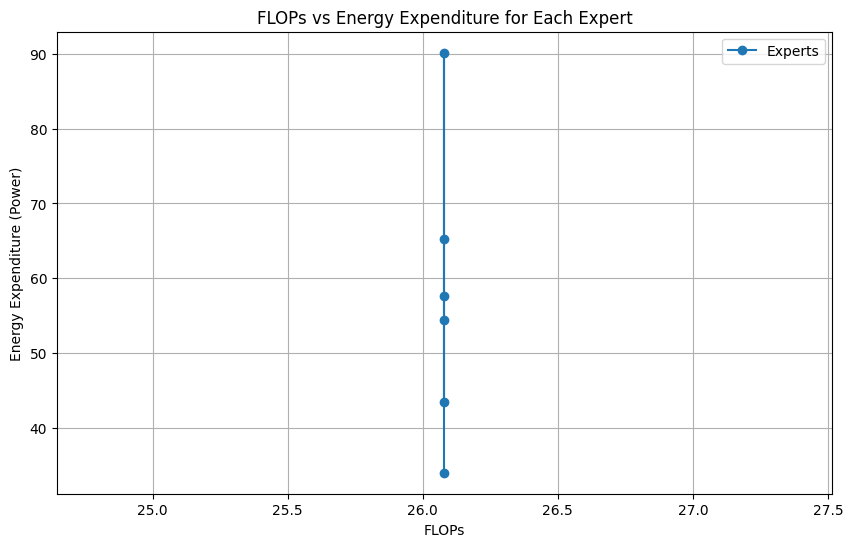

Epoch 5/5, Loss: 10.23265298207601, Top-k Accuracy (k=5): 0.08974673202614379


In [8]:
import torch
import torch.nn.functional as F
from torch import Tensor, nn
from zeta.nn import FeedForward, MultiQueryAttention
import torch.optim as optim
from torch.utils.data import DataLoader
import subprocess
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from fvcore.nn import FlopCountAnalysis, flop_count
import random

# Top-k Accuracy metric: Measure how often correct token is within top-k predictions
def calculate_top_k_accuracy(logits, targets, k=5):
    with torch.no_grad():
        _, top_k_indices = logits.topk(k, dim=-1) # get top-k predictions
        targets_expanded = targets.unsqueeze(-1).expand_as(top_k_indices)
        correct = top_k_indices.eq(targets_expanded) # check if targets in top-k
        correct_total = correct.sum().item() # total correct predictions
        total = targets.numel() # total num targets
        accuracy = correct_total / total
    return accuracy


class DepthGate(nn.Module):
    def __init__(self, dim: int, max_depth: int):
        super().__init__()
        self.dim = dim
        self.max_depth = max_depth
        self.gate = nn.Linear(dim, max_depth)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        gate_scores = F.softmax(self.gate(x), dim=-1)
        return gate_scores

class TransformerLayer(nn.Module):
    def __init__(self, dim: int, num_heads: int, ff_hidden_dim: int):
        super().__init__()
        self.attention = nn.MultiheadAttention(dim, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(dim, ff_hidden_dim),
            nn.ReLU(),
            nn.Linear(ff_hidden_dim, dim)
        )
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        attn_output, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.norm2(x + ff_output)
        return x

class MixtureOfDepthsTransformer(nn.Module):
    def __init__(self, num_tokens: int, dim: int, max_depth: int, num_heads: int, ff_hidden_dim: int, top_k: int):
        super().__init__()
        self.embedding = nn.Embedding(num_tokens, dim)
        self.max_depth = max_depth
        self.top_k = top_k
        self.depth_gate = DepthGate(dim, max_depth)
        self.layers = nn.ModuleList([TransformerLayer(dim, num_heads, ff_hidden_dim) for _ in range(max_depth)])
        self.fc_out = nn.Linear(dim, num_tokens)
        self.dim=dim
        self.flops_per_expert = []
        self.energy_per_expert = []

    def add_noise_to_embeddings(embeddings, noise_factor=0.1):
      noise = torch.randn_like(embeddings) * noise_factor
      return embeddings + noise

    def get_gpu_power(self):
        # Use nvidia-smi to get the current power draw (in watts)
        try:
            power_info = subprocess.check_output(['nvidia-smi', '--query-gpu=power.draw', '--format=csv,noheader,nounits'])
            power_draw = float(power_info.strip())  # Power in watts (W)
            return power_draw
        except Exception as e:
            print("Error getting GPU power:", e)
            return 0
    def plot_flops_vs_energy(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.flops_per_expert, self.energy_per_expert, 'o-', label="Experts")
        plt.xlabel("FLOPs")
        plt.ylabel("Energy Expenditure (Power)")
        plt.title("FLOPs vs Energy Expenditure for Each Expert")
        plt.legend()
        plt.grid(True)
        plt.show()


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        #print(x)
        # for i in range(x.size(0)):
        #      input_text = tokenizer.decode(inputs[i].tolist(), skip_special_tokens=True)
        #      print(f"Input Text: {input_text}")
        x = self.embedding(x)

        gate_scores = self.depth_gate(x)  # Shape: (batch_size, seq_len, max_depth)
        batch_size, seq_len, _ = x.size()

        # Initialize output tensor
        output = torch.zeros_like(x)
        # mask_total = torch.zeros(batch_size, seq_len, device=x.device)
        mask_total = torch.zeros(batch_size, seq_len, dtype=torch.bool, device=x.device)  # Use boolean mask
        all_tokens = x.clone()

        self.flops_per_expert.clear()
        self.energy_per_expert.clear()


        # Iterate through each depth (layer)
        for i in range(self.max_depth):
            # Get the top-K tokens for the current depth layer
            weights = gate_scores[:, :, i].unsqueeze(-1).expand(-1, -1, self.dim)
            weighted_scores = all_tokens*weights
            masked_scores = weighted_scores * (~mask_total).float().unsqueeze(-1)
            top_k_values, top_k_indices = masked_scores.topk(self.top_k, dim=-1, largest=True, sorted=False)  # Shape: (batch_size, seq_len, top_k)

            # Create a mask for top-K indices
            #mask = torch.zeros(batch_size, seq_len,  device=x.device)
            mask = torch.zeros(batch_size, seq_len, dtype=torch.bool, device=x.device)
            for b in range(batch_size):
                for s in range(seq_len):
                    mask[b, s] = torch.any(top_k_indices[b, s] == i)
            mask_total = mask_total | mask

            #mask = mask.unsqueeze(-1).expand(-1, -1, self.dim)
            masked_x = x * mask.unsqueeze(-1)
            #top_k_weights = gate_scores[:, :, i].unsqueeze(-1).expand(-1, -1, self.dim)
            #masked_x = x * mask
            weighted_x = masked_x * masked_scores
            initial_power = self.get_gpu_power()

            layer_output = self.layers[i](weighted_x)
            flops,_ = flop_count(self.layers[i],(weighted_x,))
            expert_flops = sum(flops.values())
            initial_power = self.get_gpu_power()
            layer_output = self.layers[i](weighted_x)
            final_power = self.get_gpu_power()
            avg_power = (initial_power + final_power) / 2
            print("Energy for expert ", i, avg_power)
            print("Flops for expert layer ", i, expert_flops)
            self.flops_per_expert.append(expert_flops)
            self.energy_per_expert.append(avg_power)
            output += layer_output
            #output = layer_output + x * (1 - mask)
            #x = output
            x = output * (~mask_total).unsqueeze(-1)
        self.plot_flops_vs_energy()
        return self.fc_out(output)



def perturb_input(input_ids, tokenizer, noise_type="substitution", dropout_prob=0.1, substitution_prob=0.3):
    """
    Perturbs the input tokenized text by applying dropout or substitution noise.

    input_ids: Tensor of shape (batch_size, seq_len)
    tokenizer: The tokenizer used to encode text.
    noise_type: Type of noise ('dropout' or 'substitution')
    dropout_prob: Probability of dropping tokens.
    substitution_prob: Probability of substituting tokens with random tokens.
    """
    batch_size, seq_len = input_ids.size()

    if noise_type == "dropout":
        # Word Dropout: Randomly set some token indices to the pad token
        for i in range(batch_size):
            for j in range(seq_len):
                if random.random() < dropout_prob:
                    input_ids[i, j] = tokenizer.pad_token_id

    elif noise_type == "substitution":
        # Word Substitution: Replace tokens with random tokens from the vocabulary
        vocab_size = tokenizer.vocab_size
        for i in range(batch_size):
            for j in range(seq_len):
                if random.random() < substitution_prob:
                    random_token = random.randint(0, vocab_size - 1)
                    input_ids[i, j] = random_token

    return input_ids

# Create DataLoader with custom collate_fn
def collate_fn(batch):
    input_ids = [item[0] for item in batch]
    max_length = 256
    padded_inputs = torch.stack([
        torch.cat([seq, torch.full((max_length - seq.size(0),), tokenizer.pad_token_id)])
        if seq.size(0) < max_length else seq[:max_length]
        for seq in input_ids
    ], dim=0)
    return {'input_ids': padded_inputs}

# Create DataLoader
dataloader = DataLoader(tokenized_data, batch_size=32, shuffle=True, drop_last=True,collate_fn=collate_fn)


num_tokens = tokenizer.vocab_size
model = MixtureOfDepthsTransformer(num_tokens=num_tokens, dim=512, max_depth=6, num_heads=8, ff_hidden_dim=2048,top_k=5)


# Loss, optimizer, and training loop
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

total_top_k_accuracy = 0
num_batches = 0
k = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    # reset at start of each epoch
    total_top_k_accuracy = 0
    num_batches = 0

    for batch in dataloader:
        inputs = batch['input_ids'].to(device)
        #inputs = perturb_input(inputs.clone(), tokenizer, noise_type="substitution", substitution_prob=0.1)
        #print(inputs.shape)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)

        # The model's output is (batch_size, seq_length, num_tokens)
        # We need to shift targets for next-token prediction (e.g., language modeling)
        logits = outputs[:, :-1, :].contiguous()
        targets = inputs[:, 1:].contiguous()

        loss = criterion(logits.view(-1, num_tokens), targets.view(-1))

        # Top-k accuracy calculation
        top_k_accuracy = calculate_top_k_accuracy(logits, targets, k=k)
        total_top_k_accuracy += top_k_accuracy
        num_batches += 1

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Update total loss
        total_loss += loss.item()

        # for i in range(inputs.size(0)):
        #     input_text = tokenizer.decode(inputs[i].tolist(), skip_special_tokens=True)
        #     #print(f"Input Text: {input_text}")

        #     # Extract the most likely token indices for the output
        #     top_token_indices = outputs[i].argmax(dim=-1)  # Shape: [seq_length]
        #     output_text = tokenizer.decode(top_token_indices.tolist(), skip_special_tokens=True)
        #     #print(f"Output Text: {output_text}")

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss/len(dataloader)}, Top-k Accuracy (k={k}): {total_top_k_accuracy / num_batches}")

    # Step the learning rate scheduler, if any
    scheduler.step()